In [1]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass

    
class simple_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}    
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n} | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}

In [2]:
import numpy as np

E=[(0,1),(0,2),(0,4),(0,3),(1,2),(2,4),(4,3),(3,0)]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_edges_from(E)
nx.draw(G,with_labels=True, font_weight='bold')
plt.show()

In [3]:
G=simple_graph(E)
G.adjacency_list()

{0: {1, 2, 3, 4}, 1: {0, 2}, 2: {0, 1, 4}, 3: {0, 4}, 4: {0, 2, 3}}

In [10]:
from collections import deque

def depth_first(G, start):
    path, stack = [] , deque()
    stack.append(start)
    L = G.adjacency_list()
    parent=None
    while stack:
        vertex = stack.pop()
        if vertex not in path:
          path.append(vertex)
          stack.extend(L[vertex] - set(path))
    return path

In [12]:
path=depth_first(G,0)

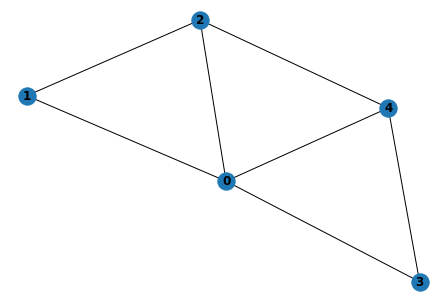